In [71]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


In [72]:
for dirpath, dirname, filenames in os.walk('COVID_IEEE'):
    print(f'there are {len(filenames)} files in {dirpath}')

there are 0 files in COVID_IEEE
there are 668 files in COVID_IEEE/normal
there are 536 files in COVID_IEEE/covid
there are 619 files in COVID_IEEE/virus


In [73]:
data_dir = pathlib.Path('COVID_IEEE')
class_name = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [74]:
def view_image(target, target_class):
    target_folder = os.path.join(target, target_class)  
    random_image = random.sample(os.listdir(target_folder), 1)[0] 
    print(random_image)  # Print the name of the random image
    img = mpimg.imread(os.path.join(target_folder, random_image))  # Correctly join the path to read the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return img

person1430_virus_2444.jpeg


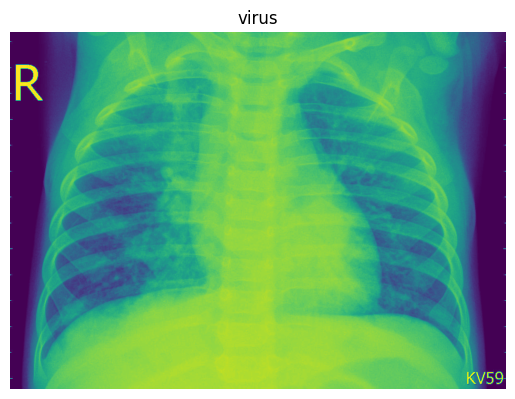

In [75]:
img =  view_image(data_dir, 'virus')

NORMAL2-IM-0650-0001.jpeg


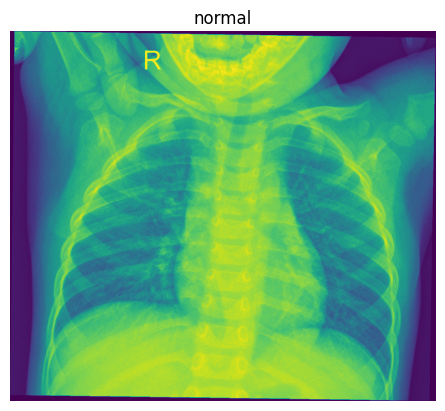

In [76]:
img =  view_image(data_dir, 'normal')

In [77]:

data = []
labels = []

covid = os.listdir(f"{data_dir}/covid")

for i in covid:
    image_path = f'{data_dir}/covid/{i}'  # Create the full path for the image
    image = cv2.imread(image_path)
    
    if image is not None:  # Check if the image was loaded successfully
        image = cv2.resize(image, (224, 224))  # Resize only if the image was loaded
        data.append(image)
        labels.append(0)
    else:
        print(f"Warning: Could not read image {image_path}")


In [78]:
normal = os.listdir(f"{data_dir}/normal")

for i in normal:
    image_path = f'{data_dir}/normal/{i}'  # Create the full path for the image
    image = cv2.imread(image_path)
    
    if image is not None:  # Check if the image was loaded successfully
        image = cv2.resize(image, (224, 224))  # Resize only if the image was loaded
        data.append(image)
        labels.append(1)
    else:
        print(f"Warning: Could not read image {image_path}")


In [79]:
virus = os.listdir(f"{data_dir}/virus")

for i in virus:
    image_path = f'{data_dir}/virus/{i}'  # Create the full path for the image
    image = cv2.imread(image_path)
    
    if image is not None:  # Check if the image was loaded successfully
        image = cv2.resize(image, (224, 224))  # Resize only if the image was loaded
        data.append(image)
        labels.append(2)
    else:
        print(f"Warning: Could not read image {image_path}")


In [80]:
img_data = np.array(data) / 255.0 # this is for normalize the data , i need to devide for 255
img_labels = np.array(labels)

In [81]:

data = np.array(data) / 255.0
img_labels = np.array(labels)

In [82]:
img_labels

array([0, 0, 0, ..., 2, 2, 2])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)


In [84]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241,315 (100.10 MB)

 Trainable params: 26,241,315 (100.10 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.4461 - loss: 1.3900 - val_accuracy: 0.7900 - val_loss: 0.5057
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8286 - loss: 0.4607 - val_accuracy: 0.8767 - val_loss: 0.3296
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8770 - loss: 0.3372 - val_accuracy: 0.8904 - val_loss: 0.3366
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9104 - loss: 0.2757 - val_accuracy: 0.9338 - val_loss: 0.1947
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.9322 - loss: 0.1885 - val_accuracy: 0.9201 - val_loss: 0.2197
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9619 - loss: 0.1260 - val_accuracy: 0.9475 - val_loss: 0.1695
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9694 - loss: 0.0755 - val_accuracy: 0.9292 - val_loss: 0.1737
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9860 - loss: 0.0394 - val_accuracy: 0.9406 - val_loss:

Text(0.5, 1.0, 'Training-Validation Accuracy')

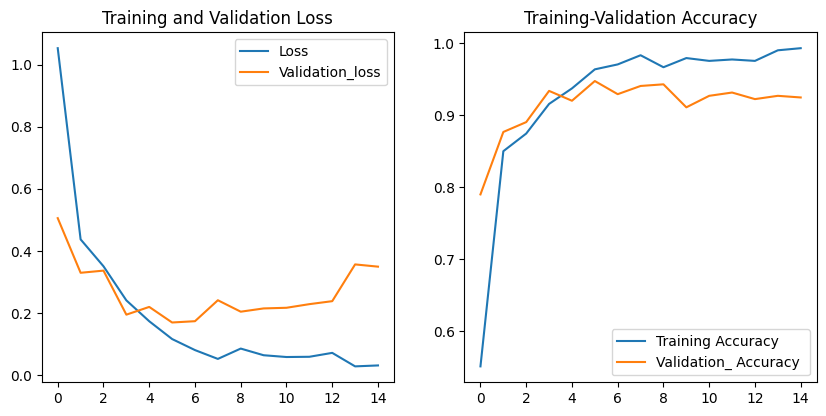

In [87]:

#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")
     

In [89]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 575ms/step


In [91]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.91      0.91      0.91       129
           2       0.89      0.93      0.91       128

    accuracy                           0.92       365
   macro avg       0.93      0.92      0.93       365
weighted avg       0.92      0.92      0.92       365



In [95]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred),
             columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,101,4,3
normal,1,117,11
virus,2,7,119


In [103]:
base_model = tf.keras.applications.MobileNet(input_shape = (224,224,3), weights = "imagenet", include_top = False)

for layer in base_model.layers:
    layer.trainable = False

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [ ]:
model = Flatten()(base_model.output)
model = Dense(units=1024, activation="rule")(model)
model = Dense(units=512, activation="rule")(model)
model = Dense(units=256, activation="rule")(model)

predictions_layer = Dense(units=3, activation="softmax")(model)

In [ ]:
model = Model(inputs = base_model.input, outputs = predictions_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])